In [200]:
from pykrx import stock
import numpy as np
import matplotlib.pyplot as plt

In [201]:
df_samsung = stock.get_market_ohlcv_by_date('20201001','20241230','005930')

In [202]:
# 변동폭 컬럼 계산추가
df_samsung['변동폭'] = df_samsung['고가'] - df_samsung['저가']

In [203]:
# 전일 변동폭과 컬럼 shift를 이용해
df_samsung['전일변동폭'] = df_samsung['변동폭'].shift(periods=1)
df_samsung.head(4)

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭
날짜,,,,,,,,
2020-10-05,57500,59200,57500,58700,20228289,0.859107,1700,NaN
2020-10-06,59400,59900,58700,59000,14463826,0.511073,1200,1700.0
2020-10-07,58700,59900,58500,59900,14861838,1.525424,1400,1200.0
2020-10-08,60500,60700,59500,59700,24589924,-0.333890,1200,1400.0


In [204]:
# 목표가 계산하여 컬럼추가 0.1 ~ 1.0
df_samsung['목표가_k_0.1'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.1)
df_samsung['목표가_k_0.2'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.2)
df_samsung['목표가_k_0.3'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.3)
df_samsung['목표가_k_0.4'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.4)
df_samsung['목표가_k_0.5'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.5)
df_samsung['목표가_k_0.6'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.6)
df_samsung['목표가_k_0.7'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.7)
df_samsung['목표가_k_0.8'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.8)
df_samsung['목표가_k_0.9'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 0.9)
df_samsung['목표가_k_1'] = df_samsung['시가'] + (df_samsung['전일변동폭'] * 1)

In [205]:
df_samsung.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가_k_0.1,목표가_k_0.2,목표가_k_0.3,목표가_k_0.4,목표가_k_0.5,목표가_k_0.6,목표가_k_0.7,목표가_k_0.8,목표가_k_0.9,목표가_k_1
날짜,,,,,,,,,,,,,,,,,,
2020-10-05,57500,59200,57500,58700,20228289,0.859107,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,59400,59900,58700,59000,14463826,0.511073,1200,1700.0,59570.0,59740.0,59910.0,60080.0,60250.0,60420.0,60590.0,60760.0,60930.0,61100.0
2020-10-07,58700,59900,58500,59900,14861838,1.525424,1400,1200.0,58820.0,58940.0,59060.0,59180.0,59300.0,59420.0,59540.0,59660.0,59780.0,59900.0
2020-10-08,60500,60700,59500,59700,24589924,-0.333890,1200,1400.0,60640.0,60780.0,60920.0,61060.0,61200.0,61340.0,61480.0,61620.0,61760.0,61900.0
2020-10-12,60000,60400,59900,60400,16145837,1.172529,500,1200.0,60120.0,60240.0,60360.0,60480.0,60600.0,60720.0,60840.0,60960.0,61080.0,61200.0


In [206]:
# 매수조건
conditions_1 = df_samsung['고가'] >= df_samsung['목표가_k_0.1']
conditions_2 = df_samsung['고가'] >= df_samsung['목표가_k_0.2']
conditions_3 = df_samsung['고가'] >= df_samsung['목표가_k_0.3']
conditions_4 = df_samsung['고가'] >= df_samsung['목표가_k_0.4']
conditions_5 = df_samsung['고가'] >= df_samsung['목표가_k_0.5']
conditions_6 = df_samsung['고가'] >= df_samsung['목표가_k_0.6']
conditions_7 = df_samsung['고가'] >= df_samsung['목표가_k_0.7']
conditions_8 = df_samsung['고가'] >= df_samsung['목표가_k_0.8']
conditions_9 = df_samsung['고가'] >= df_samsung['목표가_k_0.9']
conditions_10 = df_samsung['고가'] >= df_samsung['목표가_k_1']

In [207]:
# 수익률 계산
df_samsung['수익률_k_0.1'] = np.where(conditions_1, df_samsung['종가'] / df_samsung['목표가_k_0.1'], 1)
df_samsung['수익률_k_0.2'] = np.where(conditions_2, df_samsung['종가'] / df_samsung['목표가_k_0.2'], 1)
df_samsung['수익률_k_0.3'] = np.where(conditions_3, df_samsung['종가'] / df_samsung['목표가_k_0.3'], 1)
df_samsung['수익률_k_0.4'] = np.where(conditions_4, df_samsung['종가'] / df_samsung['목표가_k_0.4'], 1)
df_samsung['수익률_k_0.5'] = np.where(conditions_5, df_samsung['종가'] / df_samsung['목표가_k_0.5'], 1)
df_samsung['수익률_k_0.6'] = np.where(conditions_6, df_samsung['종가'] / df_samsung['목표가_k_0.6'], 1)
df_samsung['수익률_k_0.7'] = np.where(conditions_7, df_samsung['종가'] / df_samsung['목표가_k_0.7'], 1)
df_samsung['수익률_k_0.8'] = np.where(conditions_8, df_samsung['종가'] / df_samsung['목표가_k_0.8'], 1)
df_samsung['수익률_k_0.9'] = np.where(conditions_9, df_samsung['종가'] / df_samsung['목표가_k_0.9'], 1)
df_samsung['수익률_k_1'] = np.where(conditions_10, df_samsung['종가'] / df_samsung['목표가_k_1'], 1)

In [208]:
df_samsung.head()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가_k_0.1,목표가_k_0.2,...,수익률_k_0.1,수익률_k_0.2,수익률_k_0.3,수익률_k_0.4,수익률_k_0.5,수익률_k_0.6,수익률_k_0.7,수익률_k_0.8,수익률_k_0.9,수익률_k_1
날짜,,,,,,,,,,,,,,,,,,,,,
2020-10-05,57500,59200,57500,58700,20228289,0.859107,1700,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2020-10-06,59400,59900,58700,59000,14463826,0.511073,1200,1700.0,59570.0,59740.0,...,0.990431,0.987613,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2020-10-07,58700,59900,58500,59900,14861838,1.525424,1400,1200.0,58820.0,58940.0,...,1.018361,1.016288,1.014223,1.012166,1.010118,1.008078,1.006046,1.004023,1.002007,1.0
2020-10-08,60500,60700,59500,59700,24589924,-0.333890,1200,1400.0,60640.0,60780.0,...,0.984499,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2020-10-12,60000,60400,59900,60400,16145837,1.172529,500,1200.0,60120.0,60240.0,...,1.004657,1.002656,1.000663,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [209]:
df_samsung['누적수익률_1'] = df_samsung['수익률_k_0.1'].cumprod()
df_samsung['누적수익률_2'] = df_samsung['수익률_k_0.2'].cumprod()
df_samsung['누적수익률_3'] = df_samsung['수익률_k_0.3'].cumprod()
df_samsung['누적수익률_4'] = df_samsung['수익률_k_0.4'].cumprod()
df_samsung['누적수익률_5'] = df_samsung['수익률_k_0.5'].cumprod()
df_samsung['누적수익률_6'] = df_samsung['수익률_k_0.6'].cumprod()
df_samsung['누적수익률_7'] = df_samsung['수익률_k_0.7'].cumprod()
df_samsung['누적수익률_8'] = df_samsung['수익률_k_0.8'].cumprod()
df_samsung['누적수익률_9'] = df_samsung['수익률_k_0.9'].cumprod()
df_samsung['누적수익률_10'] = df_samsung['수익률_k_1'].cumprod()
df_samsung.tail()

,시가,고가,저가,종가,거래량,등락률,변동폭,전일변동폭,목표가_k_0.1,목표가_k_0.2,...,누적수익률_1,누적수익률_2,누적수익률_3,누적수익률_4,누적수익률_5,누적수익률_6,누적수익률_7,누적수익률_8,누적수익률_9,누적수익률_10
날짜,,,,,,,,,,,,,,,,,,,,,
2024-12-20,52700,53100,51900,53000,24674774,-0.188324,1200,700.0,52770.0,52840.0,...,0.482745,0.703762,0.970156,1.178987,1.056431,1.097055,1.189318,1.120767,1.18739,1.06472
2024-12-23,53400,54000,53300,53500,13672650,0.943396,700,1200.0,53520.0,53640.0,...,0.482565,0.701925,0.965464,1.170672,1.046650,1.097055,1.189318,1.120767,1.18739,1.06472
2024-12-24,53700,54500,53600,54400,11634677,1.682243,900,700.0,53770.0,53840.0,...,0.488219,0.709226,0.974239,1.179781,1.053427,1.102730,1.193927,1.123658,1.18892,1.06472
2024-12-26,54500,54600,53500,53600,10517075,-1.470588,1100,900.0,54590.0,54680.0,...,0.479365,0.709226,0.974239,1.179781,1.053427,1.102730,1.193927,1.123658,1.18892,1.06472
2024-12-27,53500,54100,53200,53700,10674616,0.186567,900,1100.0,53610.0,53720.0,...,0.480169,0.708962,0.971887,1.174531,1.046606,1.102730,1.193927,1.123658,1.18892,1.06472


In [210]:
# 투자기간 연으로 환산
delta_days = df_samsung.index[-1] - df_samsung.index[0]
delta_days.days

year = delta_days.days / 365
year

4.23013698630137

In [211]:
# 누적 수익률을 이용한 CAGR 계산 
CAGR_1 = df_samsung['누적수익률_1'].iloc[-1] ** (1/year) - 1
CAGR_2 = df_samsung['누적수익률_2'].iloc[-1] ** (1/year) - 1
CAGR_3 = df_samsung['누적수익률_3'].iloc[-1] ** (1/year) - 1
CAGR_4 = df_samsung['누적수익률_4'].iloc[-1] ** (1/year) - 1
CAGR_5 = df_samsung['누적수익률_5'].iloc[-1] ** (1/year) - 1
CAGR_6 = df_samsung['누적수익률_6'].iloc[-1] ** (1/year) - 1
CAGR_7 = df_samsung['누적수익률_7'].iloc[-1] ** (1/year) - 1
CAGR_8 = df_samsung['누적수익률_8'].iloc[-1] ** (1/year) - 1
CAGR_9 = df_samsung['누적수익률_9'].iloc[-1] ** (1/year) - 1
CAGR_10 = df_samsung['누적수익률_10'].iloc[-1] ** (1/year) - 1

CAGR_1 * 100, CAGR_2 * 100, CAGR_3 * 100, CAGR_4 * 100, CAGR_5 * 100, CAGR_6 * 100, CAGR_7 * 100, CAGR_8 * 100, CAGR_9 * 100, CAGR_10 * 100

(-15.92207739586481,
 -7.809244978717011,
 -0.6718521673064304,
 3.8761695323699774,
 1.0826717268399788,
 2.3386569647073863,
 4.279144916787492,
 2.7945059574852715,
 4.17559120154487,
 1.4935547125385362)

In [212]:
df_samsung.iloc[0].loc['시가']

57500.0

In [213]:
simple_df_samsung = df_samsung.iloc[-1].loc['종가'] / df_samsung.iloc[0].loc['시가']
simple_df_samsung_CAGR = ((simple_df_samsung ** (1/year)) - 1) * 100
simple_df_samsung_CAGR

-1.6033135957886135

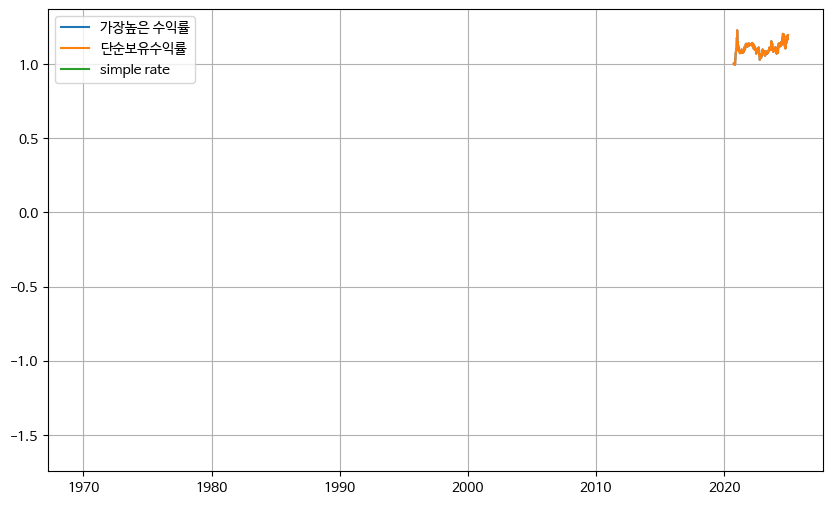

In [214]:
plt.figure(figsize= (10,6))
# 변동성 돌파 전략
plt.plot(df_samsung['누적수익률_7'], label='가장높은 수익률')



# 단순 보유
plt.plot(simple_df_samsung_CAGR, label='simple rate')

plt.grid() # 옵션으로 사용하면 그래프에 네모칸 선이 생김
plt.legend()
plt.show()